In [1]:
from heapq import heappush, heappop
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## algorithm

In [2]:
def dijkstra(graph, source):
    distance = {}
    queue = [(0, source)]
    
    while queue:
        # shortest unexplored path
        p, v = heappop(queue)
        if v in distance:
            continue

        # shortest path (source, ..., v)
        print('({}, ..., {}) = {}'.format(source, v, p))
        distance[v] = p

        # extend path to (source, ..., v, u)
        for _, u, e in graph.edges(v, data=True):
            heappush(queue, (p + e['weight'], u))
    
    return distance

## graph

In [3]:
n = 20
graph = nx.Graph()
graph.add_nodes_from(range(n))
for u, v in np.random.randint(0, n, (n, 2)):
    graph.add_edge(u, v, weight=abs(u - v))

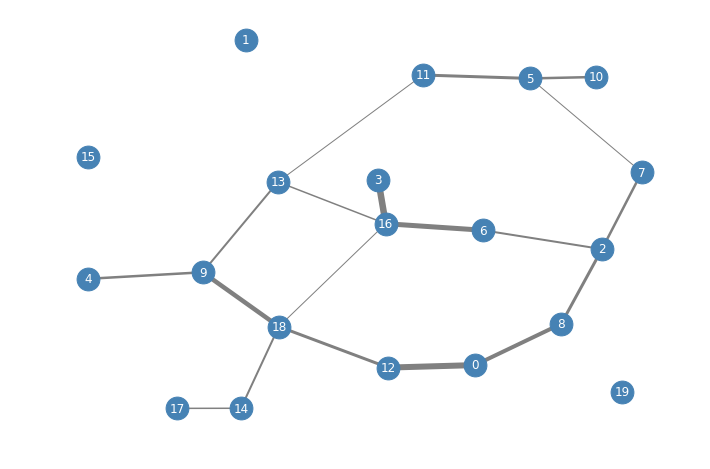

In [4]:
weights = [e['weight'] / n * 10  for (u, v, e) in graph.edges(data=True)]

plt.figure(figsize=(12, 8))
plt.axis('off')

layout = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=520)
nx.draw_networkx_edges(graph, layout, edge_color='gray', width=weights)
nx.draw_networkx_labels(graph, layout, font_color='white')

None

## run

In [5]:
distances = dijkstra(graph, 0)

(0, ..., 0) = 0
(0, ..., 8) = 8
(0, ..., 12) = 12
(0, ..., 2) = 14
(0, ..., 6) = 18
(0, ..., 18) = 18
(0, ..., 7) = 19
(0, ..., 16) = 20
(0, ..., 5) = 21
(0, ..., 14) = 22
(0, ..., 13) = 23
(0, ..., 11) = 25
(0, ..., 17) = 25
(0, ..., 10) = 26
(0, ..., 9) = 27
(0, ..., 4) = 32
(0, ..., 3) = 33
